# Cube to sphere mapping

Compare different mappings between a cube and a sphere

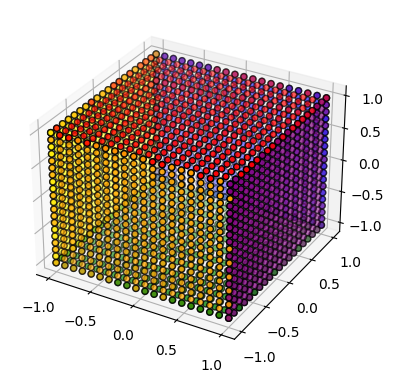

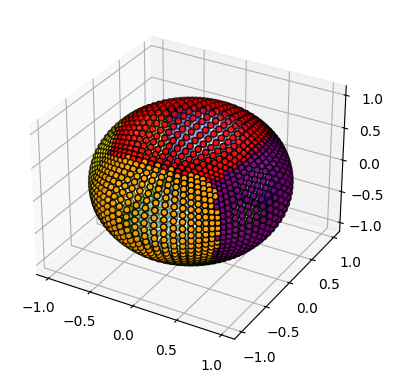

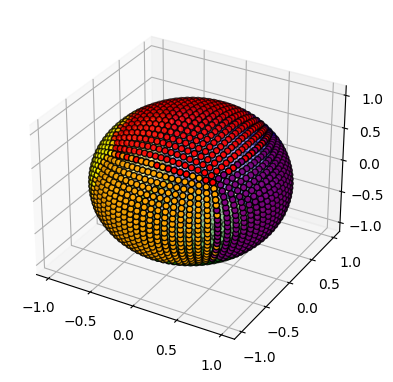

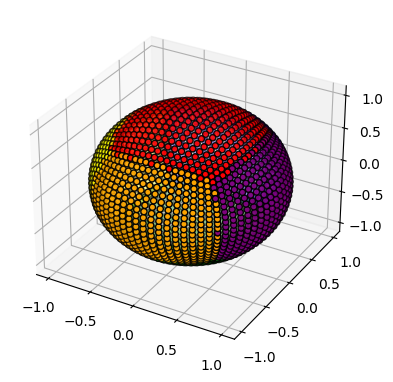

In [1]:
from utils import *

# Helper functions for visualization.
%matplotlib inline
from IPython.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

colors = ["r","g","b","orange","purple","yellow"]

axissize = 20
cube = get_cube(axissize = axissize)
n_plane = axissize**2
cols = []
for i, plane in enumerate(range(len(colors))):
    cols.extend([colors[i]]*n_plane)

threedplot(cube, cols=cols)

sphere = cube2sphere(cube, method="radial")
threedplot(sphere, cols=cols)

sphere = cube2sphere(cube, method="Nowell")
threedplot(sphere, cols=cols)

sphere = cube2sphere(cube, method="vanLangen")
threedplot(sphere, cols=cols)

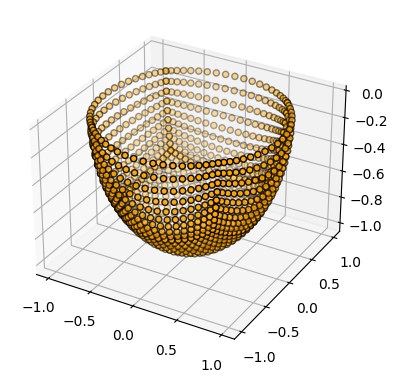

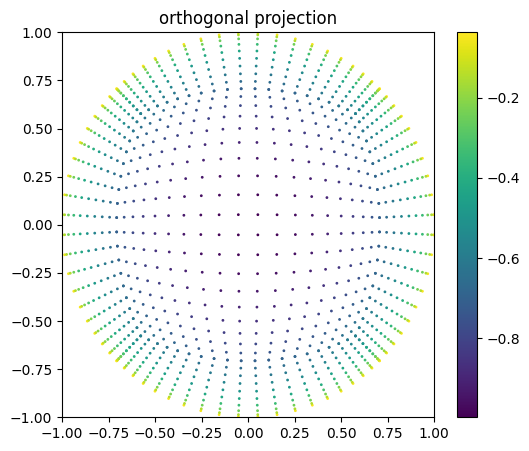

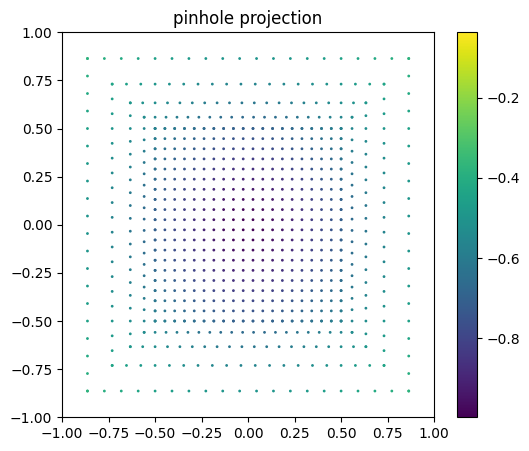

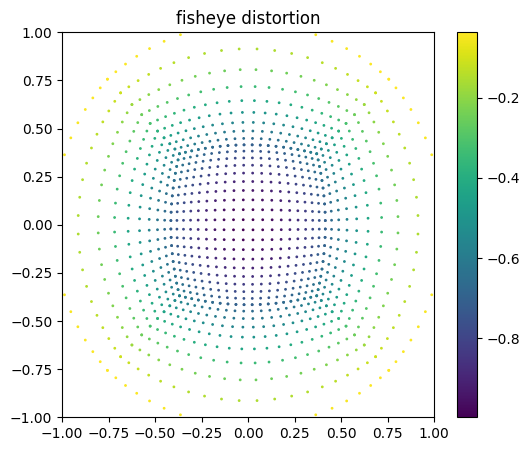

In [2]:
# Project sphere obtained from cube with radial contraction method

f = 0.5
lim = 1

points = cube2sphere(cube, method="radial")

points_t = rigid_motion(points, trans=[0,0,0])
points_t = points_t[points_t[:,2]<0]

threedplot(points_t)
x, y, z = points_t[:,0], points_t[:,1], points_t[:,2]
projected_image(x, y, z, "orthogonal projection", f=1, lim=lim)
x, y = pinhole_projection(x, y, z)
projected_image(x, y, z, "pinhole projection", f=f, lim=lim)
x, y = fisheye(x, y)
projected_image(x, y, z, "fisheye distortion", f=f, lim=lim)

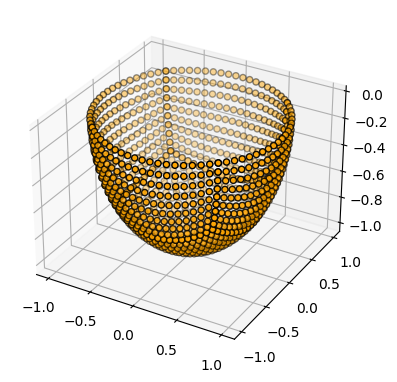

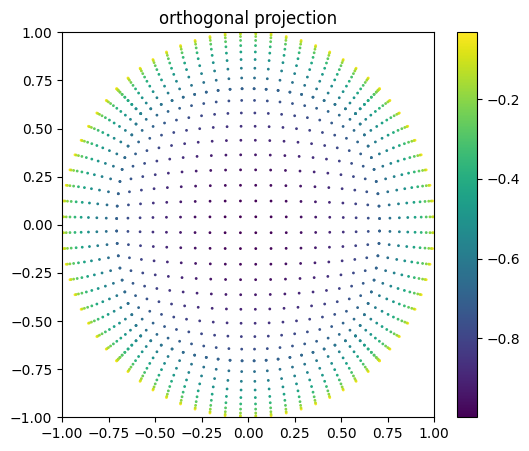

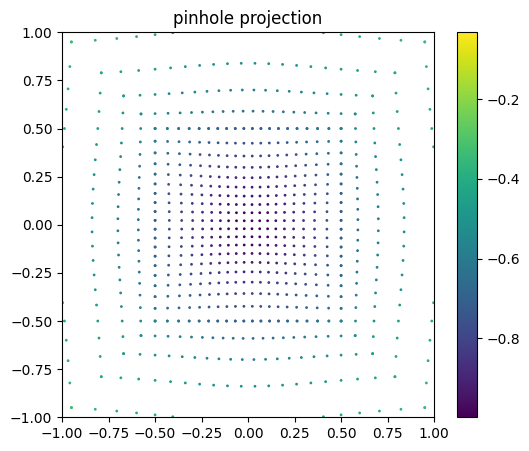

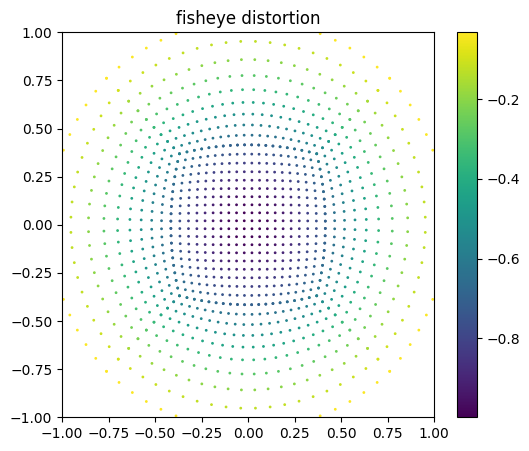

In [3]:
# Project sphere obtained from cube with van Langen method, which leads to a more homogeneous distribution on the sphere

f = 0.5
lim = 1

points = cube2sphere(cube, method="vanLangen")

points_t = rigid_motion(points, trans=[0,0,0])
points_t = points_t[points_t[:,2]<0]

threedplot(points_t)
x, y, z = points_t[:,0], points_t[:,1], points_t[:,2]
projected_image(x, y, z, "orthogonal projection", f=1, lim=lim)
x, y = pinhole_projection(x, y, z)
projected_image(x, y, z, "pinhole projection", f=f, lim=lim)
x, y = fisheye(x, y)
projected_image(x, y, z, "fisheye distortion", f=f, lim=lim)